In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
import numpy as np
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
# 1. Simulate Image Data
# Creating 10 random images of size 28x28 pixels with 1 color channel (Grayscale)
# Shape: (Batch_Size, Height, Width, Channels)
dummy_images = np.random.rand(10, 28, 28, 1)

# 2. Build CNN Model structure
cnn_model = Sequential()

# Convolutional Layer (Video 34, 35)
# filters=32: We want to detect 32 different features
# kernel_size=(3,3): Size of the filter matrix
# padding='same': Keep output size same as input size
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     padding='same',
                     activation='relu',
                     input_shape=(28, 28, 1)))

# Pooling Layer (Video 37)
# Reduces dimensionality (e.g., from 28x28 to 14x14)
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening Layer (Video 38)
# Converts the 2D matrix into a 1D vector to feed into the ANN
cnn_model.add(Flatten())

# Fully Connected Layer (Video 38 - Connection to ANN)
cnn_model.add(Dense(64, activation='relu'))

# Output Layer (e.g., for 10 classes like digits 0-9)
# Topic: Softmax (Video 15) -> Probabilities for multiclass
cnn_model.add(Dense(10, activation='softmax'))

# View the architecture summary to understand shapes
print("CNN Architecture Summary:")
cnn_model.summary()

CNN Architecture Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402,442 (1.54 MB)

 Trainable params: 402,442 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import matplotlib.pyplot as plt
# ==========================================
# 3. Prepare Target Data (Dummy Labels)
# ==========================================
# Since we have 10 images and 10 possible classes (0 to 9),
# we generate 10 random integers between 0 and 9 to serve as "correct answers".
# This is necessary for the Loss Function to compare predictions vs reality.
dummy_labels = np.random.randint(0, 10, 10)
print(f"Dummy Labels generated: {dummy_labels}")

Dummy Labels generated: [3 3 1 0 0 5 3 2 2 3]


In [4]:
# ==========================================
# 4. Compile the Model
# ==========================================
# Optimizer: 'adam' is the standard go-to optimizer.
# Loss: 'sparse_categorical_crossentropy' is used because our targets are integers (e.g., 5),
# not one-hot encoded vectors (e.g., [0,0,0,0,0,1,0,0,0,0]).
# Metrics: We want to track 'accuracy'.
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [5]:
# ==========================================
# 5. Train the Model (Fitting)
# ==========================================
# We use a small batch_size because we only have 10 records.
print("\n--- Starting Training ---")
history = cnn_model.fit(dummy_images, 
                        dummy_labels, 
                        epochs=20, 
                        batch_size=2, 
                        verbose=1)




--- Starting Training ---
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2000 - loss: 2.0307  
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4000 - loss: 1.5670
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6000 - loss: 1.2524
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8000 - loss: 1.0090
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.7779
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7000 - loss: 0.6719
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9000 - loss: 0.4720
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.3480
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.2425
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1654
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.1217
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accu

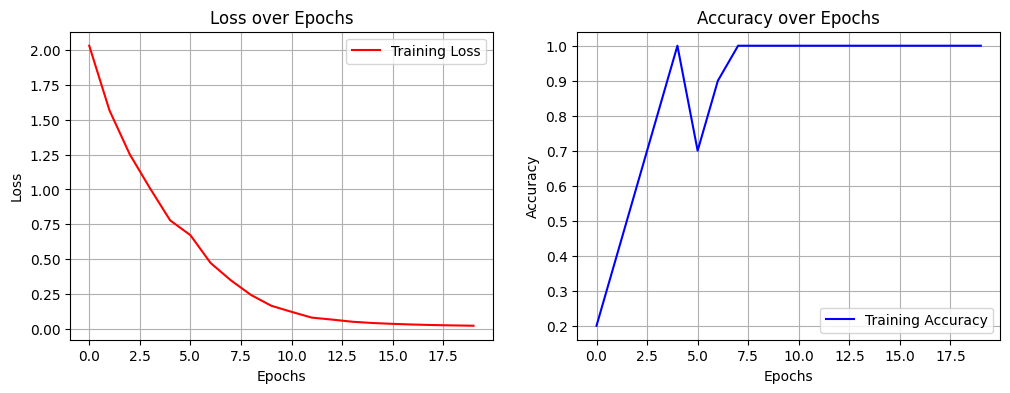

In [6]:
# ==========================================
# 6. Visualize Training Results
# ==========================================
# Even though data is random, plotting loss confirms the code structure is working.
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [7]:

# ==========================================
# 7. Make Predictions
# ==========================================
# Let's predict the class of the first image in our dummy dataset
print("\n--- Prediction for the first image ---")
sample_image = dummy_images[0].reshape(1, 28, 28, 1) # Reshape to (Batch, H, W, C)
prediction = cnn_model.predict(sample_image)

# prediction will return 10 probabilities (one for each class)
print("Raw Probabilities:", prediction)

# We use argmax to find the index of the highest probability
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}")
print(f"Actual Class: {dummy_labels[0]}")


--- Prediction for the first image ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Raw Probabilities: [[2.2711027e-03 1.6992174e-03 1.0246108e-02 9.8454422e-01 5.7882829e-07
  1.2266746e-03 7.6764650e-08 3.4249972e-08 1.0637102e-05 1.4036378e-06]]
Predicted Class: 3
Actual Class: 3
